In [602]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Предобработка

In [603]:
df = pd.read_excel('/content/drive/MyDrive/Term-paper/data_by_district_raw.xlsx')
dff = pd.read_excel('/content/drive/MyDrive/Term-paper/2019_districts_columns.xlsx')

In [604]:
df.rename(columns = {'Unnamed: 0' : 'District'}, inplace = True)
df.rename(columns = {'Turnout_neighborhood' : 'Turnout_district'}, inplace = True)
df.rename(columns = {'UG_neighborhood' : 'UG_district'}, inplace = True)

dff['Party'][dff['Supported_by'] == 'United Russia, A Just Russia, City Hall'] = 'United Russia'
dff['Party'][dff['Supported_by'] == 'United Russia'] = 'United Russia'
dff['Party'][dff['Supported_by'] == '«United Russia»'] = 'United Russia'

party_dict = dict(zip(dff.Candidate, dff.Party))

In [605]:
candidates = df[['District', 'candidate_1', 'candidate_2', 'candidate_3', 'candidate_4', 'candidate_5', 'candidate_6']]

district_winners={}
district_winners_shares={}

for i in range(len(candidates['candidate_1'])):
    if type(candidates['candidate_1'][i]) == str:
        cand1 = candidates['candidate_1'][i]
        cand2 = candidates['candidate_2'][i]
        cand3 = candidates['candidate_3'][i]
        cand4 = candidates['candidate_4'][i]
        cand5 = candidates['candidate_5'][i]
        cand6 = candidates['candidate_6'][i]
    else:
        vote1 = candidates['candidate_1'][i]
        vote2 = candidates['candidate_2'][i]
        vote3 = candidates['candidate_3'][i]
        vote4 = candidates['candidate_4'][i]
        vote5 = candidates['candidate_5'][i]
        vote6 = candidates['candidate_6'][i]
        
        
        votesum = np.nansum(np.array([vote1, vote2, vote3, vote4, vote5, vote6]))

        maxvote = max(vote1, vote2, vote3, vote4, vote5, vote6)

        share = maxvote/votesum
        district_winners_shares[candidates['District'][i]] = share

        if maxvote==vote1:
            district_winners[candidates['District'][i]] = cand1
        elif maxvote==vote2:
            district_winners[candidates['District'][i]] = cand2
        elif maxvote==vote3:
            district_winners[candidates['District'][i]] = cand3
        elif maxvote==vote4:
            district_winners[candidates['District'][i]] = cand4
        elif maxvote==vote5:
            district_winners[candidates['District'][i]] = cand5
        elif maxvote==vote6:
            district_winners[candidates['District'][i]] = cand6

del district_winners['Сумма']

In [606]:
df['district_winner'] = df['District'].map(district_winners)
df['Win_party_district'] = df['district_winner'].map(party_dict)
df['district_winner_share'] = df['District'].map(district_winners_shares)

In [607]:
df = df.drop(df.columns[22:33], axis = 1)

In [608]:
okrug_election_comission_dict = dict(zip(dff.Candidate, dff.okrug_election_comission))
UG_dict = dict(zip(dff.Candidate, dff.UG))

df['district_oec'] = df['district_winner'].map(okrug_election_comission_dict)
df['district_UG'] = df['district_winner'].map(UG_dict)

In [609]:
df.drop(df.index[df['District'] == 'Сумма'], inplace = True)

## Данные "Механика Москвы"

In [610]:
blag = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_blagoustroistvo.xlsx').T
safety = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_bezopasnost.xlsx').T
culture = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_kultura.xlsx').T
education = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_obrazovanie.xlsx').T

MX_slovar = pd.read_excel('/content/drive/MyDrive/Term-paper/MX_slovar.xlsx')
MX_dict = dict(zip(MX_slovar['name'], MX_slovar['tik']))

In [611]:
def drop_rows(df):
    district_names_MX_set = set(pd.read_excel('/content/drive/MyDrive/Term-paper/MX_slovar.xlsx')['name'])
    df = df.reset_index()
    for i in range(len(df)):
        if df['index'][i] not in district_names_MX_set:
            df = df.drop(i, axis=0)
    return df

safety = drop_rows(safety)

In [612]:
safety.rename(columns = {0 : 'sfmeasures_privateguard',
                         1 : 'sfmeasures_cameras',
                         2 : 'sfmeasures_barrier',
                         3 : 'sfmeasures_fence',
                         4 : 'sfmeasures_patrol',
                         5 : 'sfmeasures_concierge',
                         6 : 'sfmeasures_none',
                         7 : 'house_cameras',
                         8 : 'house_irondoors',
                         9 : 'house_doorlock',
                         10 : 'house_barrier',
                         11 : 'house_fence',
                         12 : 'house_concierge',
                         13 : 'house_none',
                         14 : 'afraid_thieft',
                         15 : 'afraid_burglary',
                         16 : 'afraid_carjack',
                         17 : 'afraid_mugging',
                         18 : 'afraid_defaceproperty_public',
                         19 : 'afraid_defaceproperty_private',
                         20 : 'afraid_assault',
                         21 : 'afraid_murder',
                         22 : 'afraid_rape',
                         23 : 'afraid_animals',
                         24 : 'afraid_agression_drunk',
                         25 : 'afraid_agression_young',
                         26 : 'afraid_agression_migrant',
                         27 : 'afraid_agression_police',
                         28 : 'issafe_walk_night',
                         29 : 'issafe_walk_day',
                         30 : 'neighbors_nobody',
                         31 : 'neighbors_know_face',
                         32 : 'neighbors_know_name',
                         33 : 'neighbors_talk',
                         34 : 'neighbors_spendtime',
                         35 : 'personal_unsafe_streets',
                         36 : 'personal_migrants'}, inplace = True)

safety['tik'] = safety['index'].map(MX_dict)

In [613]:
blag = drop_rows(blag)
blag.rename(columns = {0 : 'blag_money',
                         1 : 'blag_safetysystem',
                         2 : 'blag_repair',
                         3 : 'blag_cleanup',
                         4 : 'blag_organise',
                         5 : 'blag_subbotnik',
                         6 : 'blag_nothing',
                         7 : 'problem_coldwater',
                         8 : 'problem_hotwater',
                         9 : 'problem_water',
                         10 : 'problem_electricity',
                         11 : 'problem_lowheat',
                         12 : 'problem_highheat',
                         13 : 'problem_sewage',
                         14 : 'problem_wiring',
                         15 : 'problem_none',
                         16 : 'problem_dirty',
                         17 : 'problem_walls',
                         18 : 'problem_dark',
                         19 : 'problem_mice',
                         20 : 'problem_insects',
                         21 : 'problem_chute',
                         22 : 'problem_elevator',
                         23 : 'problem_drunk',
                         24 : 'problem_homeless',
                         25 : 'problem_migrants',
                         26 : 'problem_nothing',
                         27 : 'participate_money',
                         28 : 'participate_meeting',
                         29 : 'participate_initiative',
                         30 : 'participate_request',
                         31 : 'participate_track',
                         32 : 'participate_nothing',
                         33 : 'personal_low_betterment',
                         34 : 'personal_low_municipalservices',
                         35 : 'personal_dense_development',
                         36 : 'personal_hard_to_find_job',
                         37 : 'personal_expensive_living',
                         38 : 'personal_localauthorities_corruption'}, inplace = True)

blag['tik'] = blag['index'].map(MX_dict)

In [614]:
education = drop_rows(education)
education.rename(columns = {0 : 'educ_extra_music',
                         1 : 'educ_extra_art',
                         2 : 'educ_extra_owndistrict',
                         3 : 'educ_extra_citycenter',
                         4 : 'educ_extra_none',
                         5 : 'educ_extra_otherdistricts',
                         6 : 'children_educextra_owndistrict',
                         7 : 'children_educextra_center',
                         8 : 'children_educextra_otherdistricts',
                         9 : 'satisfied_educ_preschool',
                         10 : 'satisfied_educ_school',
                         11 : 'satisfied_educ_extra',
                         12 : 'problem_education',
                         13 : 'problem_children_education',
                         14 : 'problem_education_level',
                         15 : 'problem_low_qualification',
                         16 : 'problem_children_injured',
                         17 : 'problem_russian_language_educ',
                         18 : 'problem_education_access',
                         19 : 'problem_education_timetable',
                         20 : 'problem_education_extrafees',
                         21 : 'problem_education_corruption',
                         22 : 'problem_education_furniture',
                         23 : 'problem_education_equipment',
                         24 : 'problem_education_noactivities',
                         25 : 'problem_education_tariffs',
                         26 : 'problem_education_none'}, inplace = True)

education['tik'] = education['index'].map(MX_dict)

In [615]:
culture = drop_rows(culture)
culture.rename(columns = {0 : 'spendtime_home',
                         1 : 'spendtime_culture',
                         2 : 'spendtime_entertainment',
                         3 : 'spendtime_friends',
                         4 : 'spendtime_sport',
                         5 : 'spendtime_outside',
                         6 : 'spendtime_selfeducation',
                         7 : 'spendtime_work',
                         8 : 'spendtime_doesntmatter',
                         9 : 'spendtime_theatre',
                         10 : 'spendtime_museum',
                         11 : 'spendtime_showroom',
                         12 : 'spendtime_cinema',
                         13 : 'spendtime_library',
                         14 : 'spendtime_culturehouse',
                         15 : 'spendtime_park',
                         16 : 'spendtime_circus',
                         17 : 'spendtime_culture_doesntmatter',
                         18 : 'fest_owndistrict',
                         19 : 'fest_center',
                         20 : 'fest_otherdistricts',
                         21 : 'fest_programmematters',
                         22 : 'fest_stayhome',
                         23 : 'fest_countryside',
                         24 : 'enough_infrastructure_festivals',
                         25 : 'enough_infrastructure_walk',
                         26 : 'enough_infrastructure_children',
                         27 : 'enough_infrastructure_sport',
                         28 : 'enough_infrastructure_ride',
                         29 : 'enough_infrastructure_green',
                         30 : 'enough_infrastructure_placestomeet',
                         31 : 'notenough_infrastructure_culture',
                         32 : 'notenough_infrastructure_cinema',
                         33 : 'notenough_infrastructure_cafes',
                         34 : 'notenough_infrastructure_nightclubs',
                         35 : 'notenough_infrastructure_parks',
                         36 : 'notenough_infrastructure_shoppingcenters',
                         37 : 'notenough_infrastructure_shops',
                         38 : 'notenough_infrastructure_publicinternet',
                         39 : 'notenough_infrastructure_nothing'}, inplace = True)

culture['tik'] = culture['index'].map(MX_dict)



---



## 2019

In [616]:
data = pd.read_stata('/content/drive/MyDrive/Term-paper/moscow_2019_cands.dta')

In [617]:
data['winner'] = data.iloc[:, 14:239].idxmax(1)
data['winner_share'] = data.iloc[:, 14:239].max(1)/data['числодействительныхбюллетеней'] # доля победившего кандидата

party_dict_1 = dict((''.join(k.lower().split(" ")), v) for k, v in party_dict.items())
UG_dict_1 = dict((''.join(k.lower().split(" ")), v) for k, v in UG_dict.items())

data['turnout_uik'] = (data['числонедействительныхбюллетеней'] + data['числодействительныхбюллетеней']) / data['voters'] # явка
data['party_uik_winner'] = data['winner'].map(party_dict_1)
data['UG_uik_winner'] = data['winner'].map(UG_dict_1)

data = data.rename(columns={'v8': 'числобюллетенейвыданныхизбирателямпроголосовавшимдосрочно', 
                   'v9': 'числобюллетенейвыданныхизбирателямпроголосовавшимвнепомещениядляголосования'})

In [618]:
UG_candidates = dict(zip(dff[dff['UG'] == 1].okrug_election_comission, dff[dff['UG'] == 1].Candidate))
UG_candidates = dict((k, (''.join(v.lower().split(" ")))) for k, v in UG_candidates.items())
data['UG_candidate'] = data['oik'].map(UG_candidates)

In [619]:
def get_UG_candidate_share(data):
    data['UG_candidate_votes'] = ''
    data['UG_candidate_share'] = ''

    UG_candidate_names = []
    for i in range(len(data)):
        UG_candidate_names.append(data['UG_candidate'][i])

    for i in range(len(data)):
        name = UG_candidate_names[i]
        data['UG_candidate_votes'][i] = data[name][i]
        data['UG_candidate_share'][i] = data['UG_candidate_votes'][i]/data['числодействительныхбюллетеней'][i]

    return data

In [620]:
data = get_UG_candidate_share(data)

## Сумма по районам (tik)

In [621]:
dat = data.groupby('tik').agg('sum')
dat['turnout_tik'] = (dat['числонедействительныхбюллетеней'] + dat['числодействительныхбюллетеней']) / dat['voters'] # явка
dat = dat.reset_index()

In [622]:
X = pd.DataFrame(data.groupby('tik').size()).reset_index()
X = X.rename(columns={0: 'tiks_total'})
dat = dat.merge(X, left_on='tik', right_on='tik')

In [623]:
dat['winner_tik'] = dat.iloc[:, 15:239].idxmax(1) # победитель в ТИКе
dat['winner_share'] = dat.iloc[:, 15:239].max(1)/dat['числодействительныхбюллетеней'] # доля победившего кандидата
dat['win_party_tik'] = dat['winner_tik'].map(party_dict_1) # партия выигравшего кандидата
dat['win_UG_tik'] = dat['winner_tik'].map(UG_dict_1) # победило ли УГ в ТИКе

In [624]:
dat['win_party_tik'].value_counts()

United Russia      59
KPRF               46
Yabloko            11
A Just Russia       8
self-nomination     4
Name: win_party_tik, dtype: int64

## 2014

In [625]:
dat2014 = pd.read_excel('/content/drive/MyDrive/Term-paper/MGD_2014.xlsx')
dat2014 = dat2014.rename(columns=lambda x: ''.join(x.lower().split(" ")))

In [626]:
candidates_parties_2014 = pd.read_excel('/content/drive/MyDrive/Term-paper/2014candidates_parties.xlsx')
candidates_parties_2014 = candidates_parties_2014.replace(['Единая Россия'],'United Russia')
candidates_parties_2014 = candidates_parties_2014.replace(['КПРФ'],'KPRF')
candidates_parties_2014 = candidates_parties_2014.replace(['ЛДПР'],'LDPR')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская платформа'],'Civic Platform')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская Платформа'],'Civic Platform')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская сила'],'Civilian Power')
candidates_parties_2014 = candidates_parties_2014.replace(['Яблоко'],'Yabloko')
candidates_parties_2014 = candidates_parties_2014.replace(['Родина'],'Rodina')
candidates_parties_2014 = candidates_parties_2014.replace(['Зелёные'],'Green party')
candidates_parties_2014 = candidates_parties_2014.replace(['Справедливая Россия'],'A Just Russia')
candidates_parties_2014 = candidates_parties_2014.replace(['самовыдвижение'],'self-nomination')
candidates_parties_2014 = candidates_parties_2014.replace(['Социал-демократическая партия'],'Social democratic party')

In [627]:
party_dict_2014 = dict(zip(candidates_parties_2014.Candidate, candidates_parties_2014.Party))
party_dict_2014 = dict((''.join(k.lower().split(" ")), v) for k, v in party_dict_2014.items())

In [628]:
dat2014['winner'] = dat2014.iloc[:, 15:273].idxmax(1)

dat2014['winner_share'] = dat2014.iloc[:, 15:273].max(1)/dat2014['числодействительныхбюллетеней'] # доля победившего кандидата
dat2014['turnout_uik'] = (dat2014['числонедействительныхбюллетеней'] + dat2014['числодействительныхбюллетеней']) / dat2014['числоизбирателейвнесенныхвсписок'] # явка
dat2014['party_uik_winner'] = dat2014['winner'].map(party_dict_2014)

dat2014 = dat2014.replace(['125 Орехово-Борисово Южное'], '125 район Орехово-Борисово Южное')
dat2014 = dat2014.replace(['6 район Ивановское'], '5 район Ивановское')
dat2014 = dat2014.replace(['82 Красноселький район'], '82 Красносельский район')
data = data.replace(['134 Сосенская'], '132 Новомосковская')

In [629]:
subset_2nd = dat2014.drop(dat2014.iloc[:, 15:273].idxmax(1), axis=1)
dat2014['winner_2nd_2014'] = subset_2nd.iloc[:, 15:159].idxmax(1)
dat2014['winner_2nd_2014_share'] = subset_2nd.iloc[:, 15:159].max(1)/dat2014['числодействительныхбюллетеней'] # доля победившего кандидата
dat2014['party_uik_winner_2nd_2014'] = dat2014['winner_2nd_2014'].map(party_dict_2014)

## Merge data

In [630]:
data.columns

Index(['reg', 'tik', 'voters', 'числобюллетенейполученныхучастко',
       'числобюллетенейвыданныхизбирател',
       'числобюллетенейвыданныхизбирателямпроголосовавшимдосрочно',
       'числобюллетенейвыданныхизбирателямпроголосовавшимвнепомещениядляголосования',
       'числопогашенныхбюллетеней', 'ballot_box1', 'ballot_box2',
       ...
       'vote_kprf', 'uik', 'winner', 'winner_share', 'turnout_uik',
       'party_uik_winner', 'UG_uik_winner', 'UG_candidate',
       'UG_candidate_votes', 'UG_candidate_share'],
      dtype='object', length=256)

In [631]:
d2014 = dat2014[['oik', 'tik', 'uik', 'winner', 'winner_share', 'party_uik_winner', 
                 'turnout_uik', 'party_uik_winner_2nd_2014', 'winner_2nd_2014', 'winner_2nd_2014_share']]
d2014['year'] = 2014
d2019 = data[['oik', 'tik', 'uik', 'winner', 'winner_share', 'party_uik_winner', 'turnout_uik', 'UG_uik_winner', 'UG_candidate',
       'UG_candidate_votes', 'UG_candidate_share']]
d2019['year'] = 2019

In [632]:
df_inner = pd.merge(d2014, d2019, how='inner', left_on='uik', right_on='uik', suffixes=('_2014', '_2019'))
df_inner['URussia_uik_2014'] = 0
df_inner['URussia_uik_2014'][df_inner['party_uik_winner_2014'] == 'United Russia'] = 1
df_inner['URussia_uik_2019'] = 0
df_inner['URussia_uik_2019'][df_inner['party_uik_winner_2019'] == 'United Russia'] = 1

assert-ы

In [633]:
for i in range(len(df_inner)):
    res = df_inner['tik_2014'][i] == df_inner['tik_2019'][i]
    if res == False:
        print(df_inner['tik_2014'][i], df_inner['tik_2019'][i])

In [634]:
set1 = set(dat2014['tik'].unique())

for i in df_inner['tik_2019'].unique():
    if i not in set1:
        print(i)

In [635]:
crime2019 = pd.read_excel('/content/drive/MyDrive/Term-paper/crime.xlsx')

In [636]:
df_inner['tik'] = df_inner['tik_2014']
df_inner['oik'] = df_inner['oik_2014']
df_inner = df_inner.drop(['tik_2014', 'tik_2019', 'oik_2014', 'oik_2019'], axis=1)

In [637]:
data_full = df_inner.merge(crime2019, how='left', left_on='tik', right_on='tik')
data_full = data_full.merge(safety, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(blag, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(culture, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(education, how='left', left_on='tik', right_on='tik')

In [638]:
AO_dict = {'32 район Силино':'Зеленоградский АО',
 '33 район Крюково':'Зеленоградский АО',
 '34 район Старое Крюково':'Зеленоградский АО',
 '35 район Матушкино':'Зеленоградский АО',
 '40 район Савелки':'Зеленоградский АО',

 '48 Молжаниновский район':'Северный АО',
 '71 район Куркино':'Северо-Западный АО',
 '74 район Северное Тушино':'Северо-Западный АО',
 '78 район Южное Тушино':'Северо-Западный АО',
 '72 район Митино':'Северо-Западный АО',
 '73 район Покровское-Стрешнево':'Северо-Западный АО',
 '77 район Щукино':'Северо-Западный АО',
 '19 район Крылатское':'Западный АО',
 '20 район Кунцево':'Западный АО',
 '30 район Филевский парк':'Западный АО',
 '76 район Хорошево-Мневники':'Северо-Западный АО',
 '75 район Строгино':'Северо-Западный АО',

 '43 Головинский район':'Северный АО',
 '45 район Западное Дегунино':'Северный АО',
 '47 Левобережный район':'Северный АО',
 '52 район Ховрино':'Северный АО',
 '39 Бескудниковский район':'Северный АО',
 '42 район Восточное Дегунино':'Северный АО',
 '44 Дмитровский район':'Северный АО',
 '37 район Аэропорт':'Северный АО',
 '41 Войковский район':'Северный АО',
 '46 район Коптево':'Северный АО',
 '50 район Сокол':'Северный АО',
 '38 район Беговой':'Северный АО',
 '49 Савеловский район':'Северный АО',
 '51 Тимирязевский район':'Северный АО',
 '53 Хорошевский район':'Северный АО',

 '57 район Бибирево':'Северо-Восточный АО',
 '59 район Лианозово':'Северо-Восточный АО',
 '68 район Северный':'Северо-Восточный АО',
 '55 Алтуфьевский район':'Северо-Восточный АО',
 '61 район Марфино':'Северо-Восточный АО',
 '64 район Отрадное':'Северо-Восточный АО',
 '66 район Свиблово':'Северо-Восточный АО',
 '67 район Северное Медведково':'Северо-Восточный АО',
 '69 район Южное Медведково':'Северо-Восточный АО',
 '56 Бабушкинский район':'Северо-Восточный АО',
 '60 Лосиноостровский район':'Северо-Восточный АО',
 '70 Ярославский район':'Северо-Восточный АО',
 '54 Алексеевский район':'Северо-Восточный АО',
 '58 Бутырский район':'Северо-Восточный АО',
 '62 район Марьина Роща':'Северо-Восточный АО',
 '63 Останкинский район':'Северо-Восточный АО',
 '65 район Ростокино':'Северо-Восточный АО',

 '4 район Гольяново':'Восточный АО',
 '8 район Метрогородок':'Восточный АО',
 '14 район Северное Измайлово':'Восточный АО',
 '1 район Богородское':'Восточный АО',
 '13 район Преображенское':'Восточный АО',
 '15 район Соколиная гора':'Восточный АО',
 '5 район Ивановское':'Восточный АО',
 '11 район Перово':'Восточный АО',
 '3 район Восточное Измайлово':'Восточный АО',
 '6 район Измайлово':'Восточный АО',
 '12 район Восточный':'Восточный АО',
 '2 район Вешняки':'Восточный АО',
 '10 район Новогиреево':'Восточный АО',
 '7 район Косино-Ухтомский':'Восточный АО',
 '9 район Новокосино':'Восточный АО',

 '89 район Выхино-Жулебино':'Юго-Восточный АО',
 '95 район Некрасовка':'Юго-Восточный АО',
 '98 Рязанский район':'Юго-Восточный АО',
 '90 район Капотня':'Юго-Восточный АО',
 '93 район Люблино':'Юго-Восточный АО',
 '94 район Марьино':'Юго-Восточный АО',
 '91 район Кузьминки':'Юго-Восточный АО',
 '92 район Лефортово':'Юго-Восточный АО',
 '96 Нижегородский район':'Юго-Восточный АО',
 '99 район Текстильщики':'Юго-Восточный АО',
 '100 Южнопортовый район':'Юго-Восточный АО',
 '97 район Печатники':'Юго-Восточный АО',

 '115 район Братеево':'Южный АО',
 '119 район Зябликово':'Южный АО',
 '125 район Орехово-Борисово Южное':'Южный АО',
 '124 район Орехово-Борисово Северное':'Южный АО',
 '120 район Москворечье-Сабурово':'Южный АО',
 '122 район Нагатинский затон':'Южный АО',
 '128 район Царицыно':'Южный АО',
 '113 район Бирюлево Восточное':'Южный АО',
 '114 район Бирюлево Западное':'Южный АО',
 '130 район Чертаново Центральное':'Южный АО',
 '131 район Чертаново Южное':'Южный АО',
 '103 район Зюзино':'Юго-Западный АО',
 '123 Нагорный район':'Южный АО',
 '129 район Чертаново Северное':'Южный АО',
 '116 Даниловский район':'Южный АО',
 '117 Донской район':'Южный АО',
 '121 район Нагатино-Садовники':'Южный АО',

 '108 район Северное Бутово':'Юго-Западный АО',
 '111 район Южное Бутово':'Юго-Западный АО',
 '112 район Ясенево':'Юго-Западный АО',
 '104 район Коньково':'Юго-Западный АО',
 '109 район Теплый Стан':'Юго-Западный АО',
 '105 район Котловка':'Юго-Западный АО',
 '107 Обручевский район':'Юго-Западный АО',
 '110 район Черемушки':'Юго-Западный АО',
 '26 район Проспект Вернадского':'Западный АО',
 '101 Академический район':'Юго-Западный АО',
 '102 Гагаринский район':'Юго-Западный АО',
 '106 Ломоносовский район':'Юго-Западный АО',

 '29 район Тропарево-Никулино':'Западный АО',

 '132 Новомосковская':'Новомосковский АО',
 '133 Троицкий административный округ':'Троицкий АО',

 '17 район Внуково':'Западный АО',
 '24 район Ново-Переделкино':'Западный АО',
 '25 район Очаково-Матвеевское':'Западный АО',
 '28 район Солнцево':'Западный АО',
 '22 Можайский район':'Западный АО',
 '31 район Фили-Давыдково':'Западный АО',
 '18 район Дорогомилово':'Западный АО',
 '27 район Раменки':'Западный АО',

 '79 район Арбат':'Центральный АО',
 '84 Пресненский район':'Центральный АО',
 '87 район Хамовники':'Центральный АО',
 '81 район Замоскворечье':'Центральный АО',
 '85 Таганский район':'Центральный АО',
 '86 Тверской район':'Центральный АО',
 '88 район Якиманка':'Центральный АО',
 '16 район Сокольники':'Восточный АО',
 '80 Басманный район':'Центральный АО',
 '82 Красносельский район':'Центральный АО',
 '83 Мещанский район':'Центральный АО'}

In [639]:
data_full['AO'] = data_full['tik'].map(AO_dict)

In [640]:
data_full.to_csv('data_termpaper.csv', sep=';')

Можно заметить, что в тех уиках, где доля голосов за кандидата от Умного голосования низкая, гораздо больше вбросов (явка больше 50%).

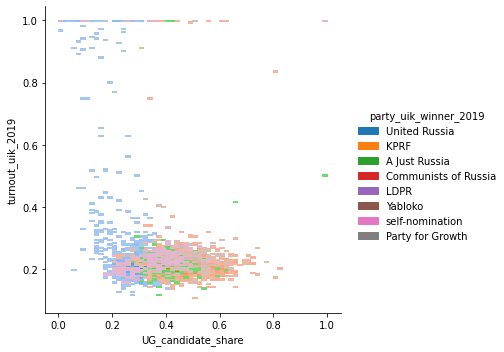

In [641]:
import seaborn as sns
sns.displot(df_inner, x="UG_candidate_share", y='turnout_uik_2019', hue="party_uik_winner_2019" ); # , kind="kde"